In [ ]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
import tensorflow_hub as hub
os.environ['TFHUB_DOWNLOAD_PROGRESS']='True'

In [ ]:
IMAGE_PATH = '/content/street.jpg'
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

In [ ]:
# function to preprocess image so that it can be handled by model
def preprocess_image(image_path):

   image = tf.image.decode_image(tf.io.read_file(image_path))
   if image.shape[-1] == 4:
     image = image[...,:-1]
   size = (tf.convert_to_tensor(image.shape[:-1]) // 4) * 4
   image = tf.image.crop_to_bounding_box(image, 0, 0, size[0], size[1])
   image = tf.cast(image,tf.float32)
   return tf.expand_dims(image,0)

def save_image(image,filename):

  if not isinstance(image, Image.Image):
      image = tf.clip_by_value(image, 0, 255)
      image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save('%s.jpg' % filename)
  print('Saved as %s.jpg' % filename)

In [ ]:
preprocess_image(IMAGE_PATH)

<tf.Tensor: shape=(1, 608, 1000, 3), dtype=float32, numpy=
array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [ 87.,  94.,  87.],
         [103., 109., 105.],
         [107., 113., 109.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [ 92.,  99.,  92.],
         [101., 107., 103.],
         [ 98., 104., 100.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [ 84.,  91.,  84.],
         [ 84.,  90.,  86.],
         [ 74.,  80.,  76.]],

        ...,

        [[169., 172., 177.],
         [170., 173., 178.],
         [173., 176., 181.],
         ...,
         [128., 128., 128.],
         [129., 129., 129.],
         [129., 129., 129.]],

        [[213., 216., 221.],
         [214., 217., 222.],
         [216., 219., 224.],
         ...,
         [131., 131., 131.],
         [133., 133., 133.],
        

In [ ]:
#%matplotlib inline
def plot_image(image,title=''):

  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis('off')
  plt.title(title)

In [ ]:
model = hub.load(SAVED_MODEL_PATH)

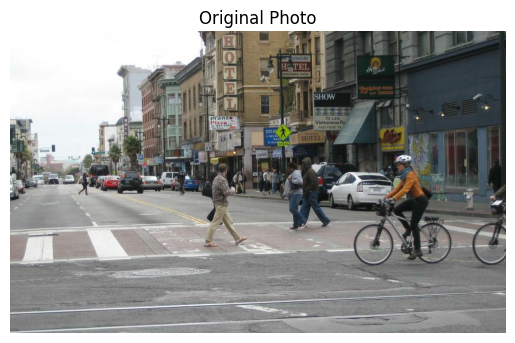

In [ ]:
load_image = preprocess_image(IMAGE_PATH)

# plot original image
plot_image(tf.squeeze(load_image),title='Original Photo')

In [ ]:
# Start Performing resolution
start = time.time()
super_image = model(load_image)
super_image = tf.squeeze(super_image)
print('Time taken to complete process: %f'%(time.time() - start))

Time taken to complete process: 104.088871


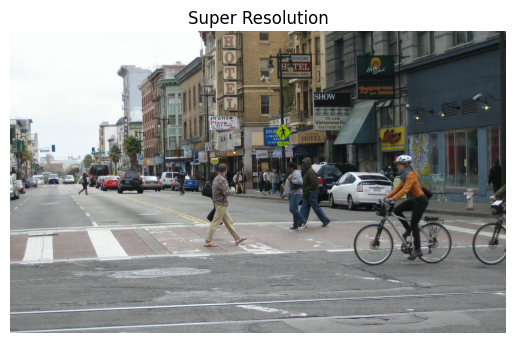

In [ ]:
plot_image(tf.squeeze(super_image),'Super Resolution')

In [ ]:
IMAGE_PATH = "/content/street.jpg"

In [ ]:
def downscale_image(image):

  image_size = []
  if len(image.shape) == 3:
    image_size = [image.shape[1], image.shape[0]]
  else:
    raise ValueError("Dimension mismatch. Can work only on single image.")

  image = tf.squeeze(tf.cast(tf.clip_by_value(image, 0, 255), tf.uint8))

  lr_image = np.asarray(Image.fromarray(image.numpy()).resize([image_size[0] // 4, image_size[1] // 4],Image.BICUBIC))

  lr_image = tf.expand_dims(lr_image, 0)
  lr_image = tf.cast(lr_image, tf.float32)
  return lr_image

In [ ]:
hr_image = preprocess_image(IMAGE_PATH)

In [ ]:
lr_image = downscale_image(tf.squeeze(hr_image))

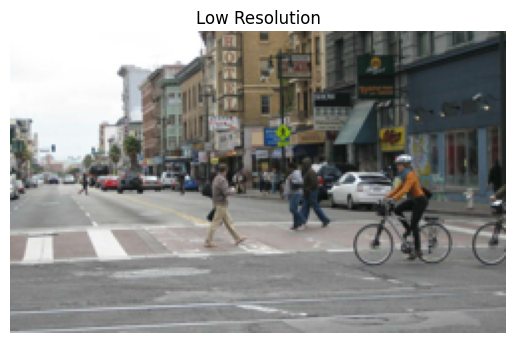

In [ ]:
plot_image(tf.squeeze(lr_image), title="Low Resolution")

In [ ]:
start = time.time()
fake_image = model(lr_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))

Time Taken: 8.442944


PSNR Achieved: 25.882095


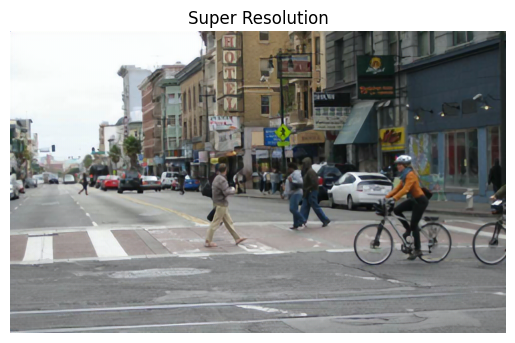

In [ ]:
plot_image(tf.squeeze(fake_image), title="Super Resolution")
# Calculating PSNR wrt Original Image
psnr = tf.image.psnr(
    tf.clip_by_value(fake_image, 0, 255),
    tf.clip_by_value(hr_image, 0, 255), max_val=255)
print("PSNR Achieved: %f" % psnr)

PSNR: 25.882095


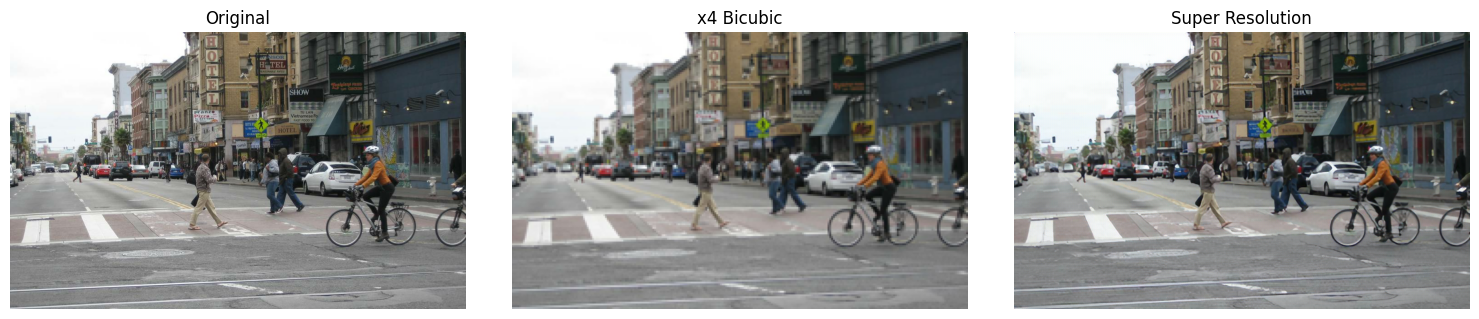

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]
fig, axes = plt.subplots(1, 3)
fig.tight_layout()
plt.subplot(131)
plot_image(tf.squeeze(hr_image), title="Original")
plt.subplot(132)
fig.tight_layout()
plot_image(tf.squeeze(lr_image), "x4 Bicubic")
plt.subplot(133)
fig.tight_layout()
plot_image(tf.squeeze(fake_image), "Super Resolution")
plt.savefig("ESRGAN_DIV2K.jpg", bbox_inches="tight")
print("PSNR: %f" % psnr)

In [ ]:
import os
import cv2
import numpy as np
import urllib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
modelFile = "/content/frozen_inference_graph.pb"
configFile = "/content/ssd_mobilenet_v2_coco_2018_03_29.pbtxt"
classFile = "/content/coco_class_labels.txt"

if not os.path.isdir('models'):
    os.mkdir("models")

if not os.path.isfile(modelFile):
    os.chdir("models")
    # Download the tensorflow Model
    urllib.request.urlretrieve('http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz', 'ssd_mobilenet_v2_coco_2018_03_29.tar.gz')

    # Uncompress the file
    !tar -xvf ssd_mobilenet_v2_coco_2018_03_29.tar.gz

    # Delete the tar.gz file
    os.remove('ssd_mobilenet_v2_coco_2018_03_29.tar.gz')

    # Come back to the previous directory
    os.chdir("..")

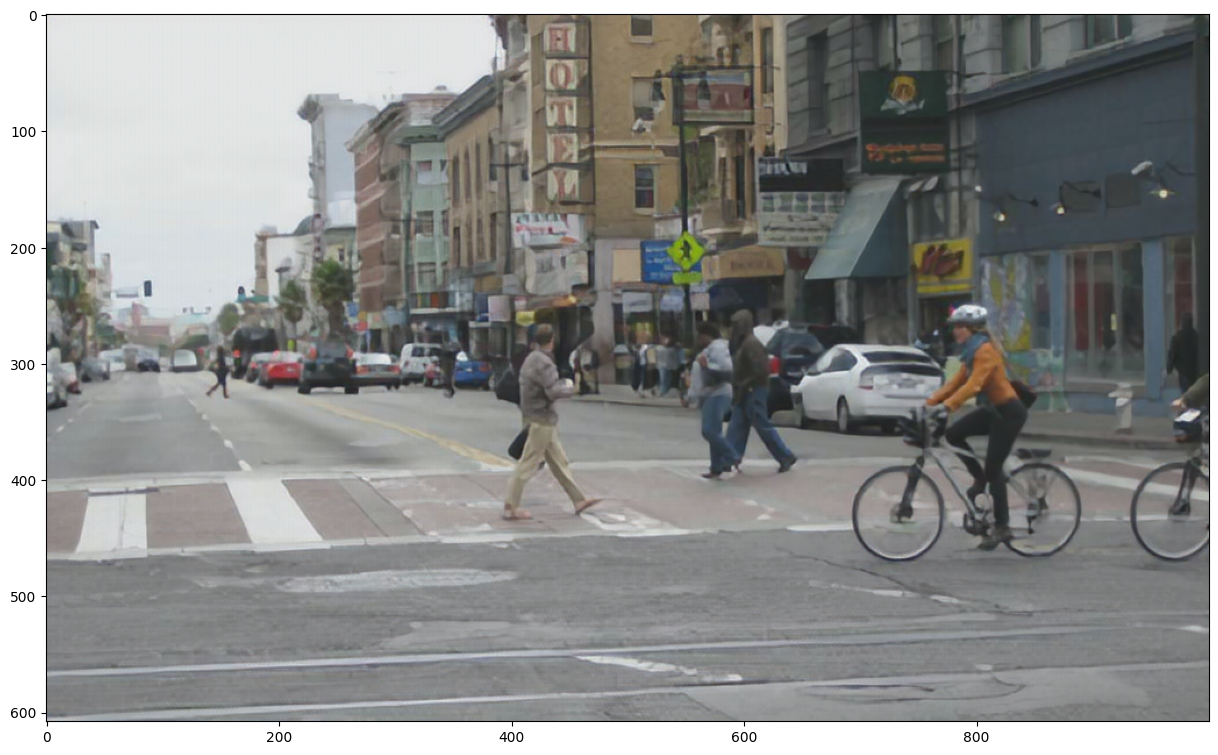

In [85]:
# Convert TensorFlow tensor to numpy array
image_np = fake_image.numpy()

# Normalize pixel values to [0, 1] range
image_np = (image_np - np.min(image_np)) / (np.max(image_np) - np.min(image_np))

# Then multiply by 255 and convert to uint8
image_np = (image_np * 255).astype(np.uint8)

# Display the image
plt.imshow(image_np)
plt.show()


In [87]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Read the Tensorflow network
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)
print("Image array shape:", image_np.shape)

Image array shape: (608, 1000, 3)


In [88]:
# Function to read class names from file
def read_class_names(file_path):
    with open(file_path, 'r') as f:
        class_names = f.readlines()
    class_names = [name.strip() for name in class_names]
    return class_names


In [89]:
# Define function to detect objects
def detect_objects(net, im):
    blob = cv2.dnn.blobFromImage(im, size=(300, 300), swapRB=True, crop=False)
    net.setInput(blob)
    objects = net.forward()
    return objects

In [90]:
# Function to display detected objects
def display_objects(im, objects, threshold=0.4, class_names=None):
    rows = im.shape[0]
    cols = im.shape[1]

    for i in range(objects.shape[2]):
        classId = int(objects[0, 0, i, 1])
        score = float(objects[0, 0, i, 2])

        if score > threshold:
            x = int(objects[0, 0, i, 3] * cols)
            y = int(objects[0, 0, i, 4] * rows)
            w = int(objects[0, 0, i, 5] * cols - x)
            h = int(objects[0, 0, i, 6] * rows - y)

            cv2.rectangle(im, (x, y), (x + w, y + h), (200, 200, 200), 2)  # Change color to lighter white

            if class_names is not None:
                class_name = class_names[classId]
                cv2.putText(im, class_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 165, 255), 2)  # Change color to gold

    plt.figure(figsize=(16, 12))
    plt.imshow(im)
    plt.axis('off')
    plt.show()


Image array shape: (608, 1000, 3)


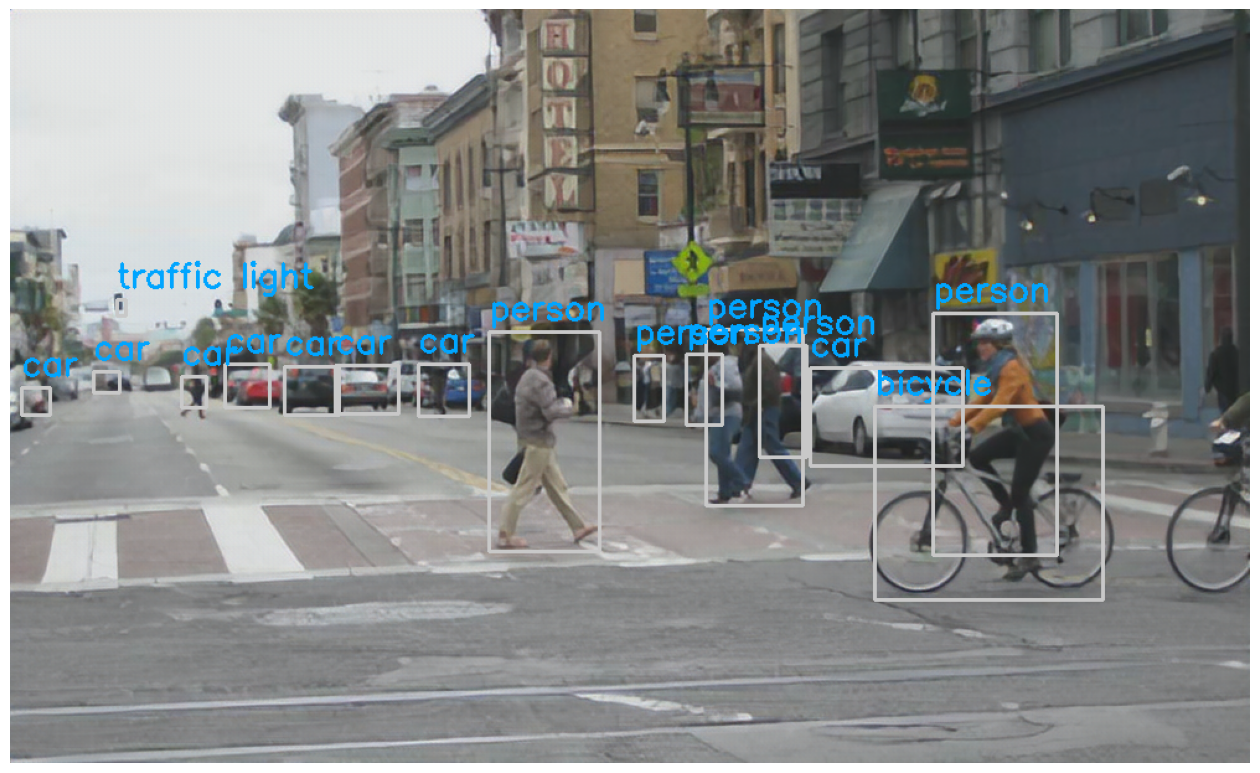

In [86]:
# Load the class names from file
class_names = read_class_names('/content/coco_class_labels.txt')

# Detect objects
objects = detect_objects(net, image_np)

# Display the objects with class names
display_objects(image_np, objects, class_names=class_names)

